<a href="https://colab.research.google.com/github/KJ-black/Machine-Learning-on-Material-Informatics/blob/main/HW8_Image_Segmentation/HW8_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Simple Image
Using numpy to create the image 
- 0: white
- 1: black

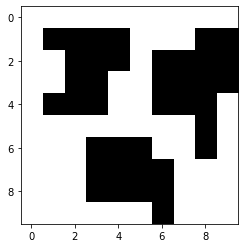

In [39]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [0, 0, 1, 1, 1, 0, 1, 1, 1, 1], 
    [0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 0], 
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]
)
plt.imshow(data, cmap='binary')
plt.show()

# Algorithm to Segment the Image
Using DFS method to travse one black block, the start point is a black point.

In [40]:
def DFS(array, row, col) :
    direction = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    array[row, col] = 0 # visited 
    for row_d, col_d in direction:
        new_row = row + row_d
        new_col = col + col_d
        
        # check boundary condition and whether the new point is not visited yet
        if 0 <= new_row < array.shape[0] and 0 <= new_col < array.shape[1] and array[new_row, new_col] == 1 :
            DFS(array, new_row, new_col)

# Use DFS Algorithm to Get Each Black

Use the travse array to do DFS and the different between travse and residual is the vistied black.

### Some Notes
- numpy copy (different from list)
  - shallow copy (data will influence each other)
    - b = a
      - id(b) == id(a)
    - b = a[:]
      - will create a new instance b
      - id(b) != id(a)
  - deep copy (data won't influence each other)
    - b = a.copy()

In [49]:
size_of_blocks = []
blocks = []

travse = data.copy() # travse is the data points that will be visited first 
residual = data.copy() # residual is the remains that not yet been visited

# travse all the 
for row in range(data.shape[0]):
    for col in range(data.shape[1]):

        # Once visit the black point, use it as start point to do DFS
        if travse[row, col] == 1 :
            DFS(travse, row, col)
            size_of_blocks.append(np.sum(residual) - np.sum(travse))
            blocks.append(residual - travse)
            residual = travse.copy()

        if (np.sum(residual)==0):
            break
    if (np.sum(residual)==0):
        break

# Show Result

Total number of black blocks in the image: 3

Blocks 0
Ths size of block is: 12


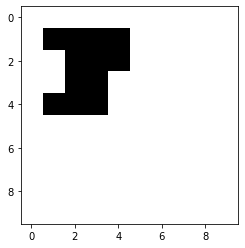


Blocks 1
Ths size of block is: 15


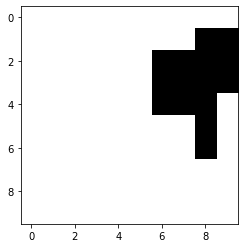


Blocks 2
Ths size of block is: 12


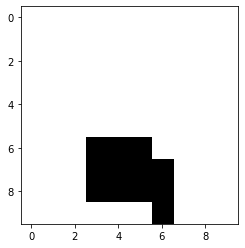

In [52]:
print("Total number of black blocks in the image: %d" % len(blocks))
print()

for i in range(len(blocks)) :
    print("Blocks %d" % i)
    print('Ths size of block is: %d' % size_of_blocks[i])
    plt.imshow(blocks[i], cmap='binary')
    plt.show()
    print()